In [2]:
import pandas as pd
import numpy as np
import sklearn.feature_extraction.text as text
from sklearn import decomposition
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import nltk
from nltk.tokenize import wordpunct_tokenize
import pickle

# Load in the data set

In [121]:
with open('nyt_markets_complete_df.pickle', 'rb') as dff:
    nyt_markets_df = pickle.load(dff)

In [122]:
nyt_markets_df.columns = ['index','date', 'url','article']

In [123]:
import re, datetime
def regex_date(string):
    try:
        match = re.search('\d{4}/\d{2}/\d{2}',string)
        date = datetime.datetime.strptime(match.group(), '%Y/%m/%d').date()
        return date
    except:
        return None

In [124]:
nyt_markets_df['url_date'] = nyt_markets_df['url'].apply(regex_date)

In [125]:
columns = ['index','date']
nyt_markets_df.drop(columns, axis=1, inplace=True)

In [37]:
nyt_markets_df_clean = nyt_markets_df.dropna(subset=['article'])

In [38]:
print("Corpus is now",nyt_markets_df_clean.shape[0],"documents long")

Corpus is now 13496 documents long


In [52]:
import pandas as pd
import matplotlib
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from datetime import datetime
import nltk, re

In [53]:
stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 

def text_cleanup(input_text):
    one = " ".join([i for i in input_text.lower().split() if i not in stopwords])
    two = "".join(re.sub(r'[^a-zA-Z ]', '', i) for i in one if i not in punctuation)
    #three = [WordNetLemmatizer().lemmatize(i) for i in two.split()]
    return two

In [54]:
nyt_markets_df_clean['article_clean'] = nyt_markets_df_clean[['article']].applymap(text_cleanup)['article']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
nyt_markets_df_clean.head()

,url,article,url_date,article_clean
0,https://www.nytimes.com/2019/05/29/business/de...,Good Wednesday. (Want this by email? Sign up h...,2019-05-29,"[good, wednesday, want, email, sign, hereboth,..."
1,https://www.nytimes.com/2017/12/03/business/me...,Dozens of people were gathered on a Manhattan ...,2017-12-03,"[dozen, people, gathered, manhattan, rooftop, ..."
2,https://www.nytimes.com/2016/02/05/business/en...,LONDON — Royal Dutch Shell became the latest b...,2016-02-05,"[london, royal, dutch, shell, became, latest, ..."
3,https://www.nytimes.com/2016/01/31/nytnow/your...,Here are the week’s top stories.1. The preside...,2016-01-31,"[week, top, story, presidential, candidate, ma..."
5,https://www.nytimes.com/2016/06/24/world/middl...,"BURG MIGHEIZIL, Egypt — In the raggedy fishing...",2016-06-24,"[burg, migheizil, egypt, raggedy, fishing, vil..."


# The above steps preprocess the data. 

# The below taxonomy is derived from my reading of various articles, and identifying bullish and bearish sentences from those articles. 

In [82]:
topic_taxonomy = {
    "Bullish":
    {
        "Bullish1": "But the company’s stock rose about 5 percent in Amsterdam trading, as Shell said it would maintain its dividend, paying out at least $1.88 a share for 2016",
        "Bullish2": "Talk of a potential freeze had already helped lift the oil markets from their January lows below $30 per barrel to about $43 per barrel for Brent crude",
        "Bullish3": "A few months ago the Saudis seemed to have steered the market back to what were, for their purposes, more comfortable price levels by orchestrating output cuts with Russia and other producers",
        "Bullish4": "The certification is intended to help clean fuel producers distinguish themselves to customers seeking green products — a kind of Good Housekeeping Seal of Approval for the environmentally conscious",
        "Bullish5": "In November, the country finally completed transmission lines connecting its huge solar power plants in the northern desert to the densely populated south, allowing lower prices and more reliable energy supplies",
        "Bullish6": "Demand for electricity is increasing rapidly in Latin America: Growing middle classes are buying appliances, while many countries are embracing energy-intensive industries",
        "Bullish7": "But if the region expands renewable energy and grid integration, electricity sector carbon emissions will drop by 15 percent and other contaminants by 10 percent",
        "Bullish8": "A few months ago the Saudis seemed to have steered the market back to what were, for their purposes, more comfortable price levels by orchestrating output cuts with Russia and other producers",
        "Bullish9": "As energy policies, technologies and markets shift to encourage the growth of renewable power plants, rooftop solar and decentralized systems like microgrids, storage is gaining more investment and interest while regulators are moving to require its inclusion in renewable energy developments and wholesale electricity markets",
        "Bullish10": "But last year Saudi Aramco entered a deal with Halliburton to drill through shale to produce gas, which could be used to fuel Saudi electricity and as an input for its growing petrochemical industry",
        "Bullish11": "In recent years the eastern Mediterranean has become one of the world’s hottest offshore drilling zones, with a string of major gas discoveries in the territorial waters of Israel, Lebanon and Cyprus. Egypt struck the jackpot in 2015 with the discovery of a giant reservoir known as Zohr that has developed into one of the largest single gas fields in the Middle East",
        "Bullish12": "Prices at the pump are climbing quickly as oil prices firm and the summer driving season approaches.",
        "Bullish13": "The principal reason for the rise in gasoline prices is the roughly 50 percent spike in the American oil benchmark from $26 a barrel on Feb. 11 to just over $40 a barrel before crude prices sputtered in the last couple of days",
        "Bullish14": "The United States and 11 other Pacific Rim nations neared agreement on Sunday night on the largest regional trade accord in history, a potentially precedent-setting model for global commerce and worker standards that would tie together 40 percent of the world’s economy, from Canada and Chile to Japan and Australia",
        "Bullish15": "The company said sales rose 59 percent in the first quarter to $4.8 billion. Its operating profit rose 71 percent to $1.3 billion",
        "Bullish16": "For many American investors, Alibaba is seen as a proxy for the health of the Chinese economy and the strength of its consumers. The company has outperformed the broader retail market in China",
        "Bullish17": "President Trump said on Monday that his administration had reached an initial trade agreement with Japan and would announce a deal in the coming weeks",
        "Bullish18": "According to U.S. officials, negotiators discussed intellectual property protections, so-called forced tech transfer and China’s promise to buy “substantial” amounts of American agricultural, energy and manufacturing products",
        "Bullish19": "In the United States, at least, investors do not seem to be terribly worried",
        "Bullish20": "The simplest answer is that by our calculations the fiscal stimulus is about 10 times greater than the potential drag from trade,” said Jason Trennert, chairman of the Wall Street research firm Strategas Research Partners",
        "Bullish21": "The twin propellers are pushing huge sums of money into the United States economy, which already appears to be in extremely good shape",
        "Bullish22": "In May, unemployment fell to 3.8 percent, a new 18-year low",
        "Bullish23": "The economy has withstood the threat that China and other emerging markets would drag down the global economy, a fear that enveloped financial markets over the summer",
        "Bullish24": "Jobs and incomes are growing, debt levels are low and gas at about $2 a gallon should help",
        "Bullish25": "Surveys show that consumers have been this confident only twice before, at the height of the economic booms of the 1960s and 1990s, and their mood is bright across income groups, not just among the rich",
        "Bullish26": "The misery index, invented in the 1970s to describe the agonizing combination of inflation and unemployment, is now just 6 percent, matching the lowest levels of the last half century",
        "Bullish27": "The Commerce Department reported Friday that the economy grew at a very strong pace of 3.5 percent in the third quarter, putting it on track for its best year in more than a decade",
        "Bullish28": "Officials at the Fed’s most recent meeting in July said they were almost ready to raise rates because they expected the economy’s continuing upward trajectory to eventually push prices up, too, according to an official account of the meeting published by the Fed on Wednesday",
        "Bullish29": "The Fed’s standard view, widely shared by outside economists, is that tighter labor market conditions will contribute to faster inflation as workers are able to extract larger wage increases",
        "Bullish30": "The political deadlock in Berlin, though alarming by German standards, has not been enough to shake investors’ faith that the Germans will work it out somehow",
        "Bullish31": "Japan’s growth showed surprising strength in the three months that ended in June, but the country faces its most serious economic challenges in years",
        "Bullish32": "The figure exceeded economists’ expectations, which had been tempered by slowing global demand",
        "Bullish33": "In the nearer term, the economy could get a boost this quarter as consumers buy big-ticket items hoping to get out ahead of the rise",
        "Bullish34": "Every major economy on earth is expanding at once, a synchronous wave of growth that is creating jobs, lifting fortunes and tempering fears of popular discontent",
        "Bullish35": "Policymakers at the September meeting expected the economy to continue growing steadily with the help of their rate cuts, the minutes showed",
        "Bullish36": " A weakening dollar not only reduces the cost of goods made in the United States and sold in foreign markets, it also increases international profits for American firms when they convert their overseas earnings back into dollars",
        "Bullish37": "We continue to see decent earnings growth in areas such as the consumer discretionary sector",
        "Bullish38": "Corporate rates were already on a downward trajectory. Many countries have used low taxes as an advantage over the United States, which offers a huge domestic market, plentiful venture capital and relatively light workplace regulation",
        "Bullish39": "Uber, which has had a reputation for aggressive pursuit of market share even at the expense of profitability, reported a rare quarterly profit on Wednesday that was driven by taking the opposite approach: Waving the white flag in challenging overseas markets",
        "Bullish40": "That is an improvement over the previous quarter, when the company recorded a loss of $1.1 billion on revenue of $10.9 billion",
        "Bullish41": "The Standard & Poor’s 500-stock index increased 8 percent per year from 1970 to 2015, on average",
        "Bullish42": "By contrast, earnings at firms that generate most of their sales within the United States grew about 6 percent",
        "Bullish43": "After months of hand-wringing about an imminent recession late last year, the United States economy proved surprisingly resilient through the first three months of 2019, expanding at a 3.2 percent clip",
        "Bullish44": "A rebound in the shares of big technology companies propelled the stock market to record highs this year",
        "Bullish45": "The four biggest domestic carriers — American Airlines, Southwest Airlines, Delta Air Lines and United Airlines — together earned about $22 billion in profits last year, a stunning turnaround after a decade of losses, bankruptcies and cutbacks",
        "Bullish46": "BlackBerry’s plan to revive its fortunes by becoming more of a software and service company gained some legitimacy on Friday when it reported a 119 percent rise in revenue over last quarter from that segment",
        "Bullish47": "Right now, the collective forecast is that profits at S&P 500 companies will jump more than 10 percent in 2020, a view that defies expectations for the economy to slow further",
        "Bullish48": "That reflects the strong job market and helps support consumer spending, which is the bedrock for economic growth in the United States",
        "Bullish49": "The central bank made its first cut in July and, most recently, announced that it would expand its balance sheet, a process that pumps money into financial markets. All of this has been good for stocks",
        "Bullish50": "On Thursday, Amazon reported net income of $857 million in its most recent quarter, the third quarter in a row in which it has shown a record profit",
        "Bullish51": "Profit rose to $1.24 billion, or 28 cents a share, up from $770 million, or 17 cents a share, in the year-ago period. Excluding one-time items, Coke’s earnings were 38 cents a share, a penny more than analysts had predicted",
        "Bullish52": "Analysts estimate that, when all the results are in for S&P 500 companies, fourth-quarter profits will have risen 15 percent over a year earlier. That would be the fifth-straight period of double-digit profit growth, according to I/B/E/S data from Refinitiv",
        "Bullish53": "Wall Street expects an improvement from the 0.1 percent increase recorded from July to August, suggesting that consumers are optimistic about the economy heading into the crucial holiday shopping season, even as interest rates rise",
        "Bullish54": "As Apple reported revenue and profit increases that beat Wall Street expectations for its fiscal fourth quarter, the company said it was also seeing strong demand for the iPhone X, as well as for the iPhone 8 and iPhone 8 Plus models, which it unveiled in September",
        "Bullish55": "Gross merchandise volume, a closely followed measure of the total transactions on the company’s websites, rose 23 percent from the same period a year earlier, to $149 billion",
        "Bullish56": "Microsoft’s Azure unit, which supplies cloud-based computer processing and storage, and competes most directly with Amazon Web Services, grew by 89 percent over the same period a year ago",
        "Bullish57": "Revenue rose 17 percent to $30.09 billion in its fiscal fourth quarter that ended in June, higher than the Wall Street consensus estimate of $29.21 billion",
        "Bullish58": "Despite all the uncertainty in the region — from grappling with “Brexit” negotiations to elections in several countries — the economy seems to be holding up",
        "Bullish59": "BNP Paribas’s profit rose 4.4 percent in the first quarter, driven in part by gains in its fixed income and equity trading businesses",
        "Bullish60": "The Fed’s unanimous decision to raise its benchmark interest rate on Wednesday reflected the confidence of its officials that the economy remains strong — even as they insisted that future rate increases would depend on continued growth",
        "Bullish61": "But given that the Fed is nearing an important policy turning point, namely a decision to raise interest rates for the first time in nine years, the fact that there are highly consistent signals about what is happening in the economy in the labor market actually is welcome in its own right",
        "Bullish62": "Officials also increased their expectations for economic growth this year in the United States, declaring that “the economic outlook has strengthened in recent months",
        "Bullish63": "The Federal Reserve, which holds more bonds than any other investor, is planning how to shed some of them starting this year And no one is too worried about it",
        "Bullish64": "The bond sale will help finance Aramco’s $69 billion purchase of another Saudi state-controlled company, the petrochemical maker Saudi Basic Industries Corporation",
        "Bullish65": "The American bank on Tuesday said that it would include sovereign debt issued by China in three existing fixed-income indexes — becoming the first major international benchmark provider to do so",
        "Bullish66": "Bonds have risen sharply in value, and their yields, which move in the opposite direction, have plummeted That has made stock prices look cheap and dividends generous",
        "Bullish67": "It is possible that a falling unemployment rate at a time of solid economic growth could put ample pressure on wages that would, in turn, raise inflation off the floor",
        "Bullish68": "The Standard & Poor’s 500-stock index has soared more than 320 percent since emerging from the rubble of the financial crisis in March 2009, creating more than $18 trillion in wealth",
        "Bullish69": "So far, 87 percent of companies that have reported earnings have exceeded Wall Street’s estimates, well above the 70 percent average over the past five years, and FactSet is now forecasting that second-quarter profits for companies in the Standard & Poor’s 500-stock index will be up 20.8 percent from a year earlier",
        "Bullish70": "That is an improvement over the previous quarter, when the company recorded a loss of $1.1 billion on revenue of $10.9 billion",
        "Bullish71": "This follows a first quarter in which profits ballooned by 24.6 percent and 78 percent of companies announced profits that exceeded analysts’ expectations",
        "Bullish72": "The Federal Reserve has been raising interest rates, saying that the labor market has been strengthening and that economic activity has been rising",
        "Bullish73": "If Chinese companies were to broadly adopt the approach for their debt issues, banks could temporarily shore up their balance sheets by replacing troubled loans with shares that have at least some value",
        "Bullish74": "Still, when stocks have moved higher for several years, notching the second-longest bull run in Standard & Poor’s records, the market’s optimism should be taken seriously",
        "Bullish75": "The latest rally, which has lifted the market more than 16 percent from the low point it hit in February, suggests that investors do not believe that the bad jobs numbers are an early signal of a slowdown",
        "Bullish76": "Investors may also be seeing less political risk in the United States",
        "Bullish77": "Lower interest rates made returns on government bonds around the world less appealing and drove investors to seek returns in the stock market",
        "Bullish78": "Strong earnings reports from technology companies since Wednesday’s close have provided respite from the selling that had gripped stock markets this month and wiped away this year’s gains",
        "Bullish79": "Rising rates can be a sign of a healthy, growing economy, and if the Fed can keep it from overheating, it may well be good for stocks",
        "Bullish80": "Stocks had recorded a succession of highs in the hope that President Trump’s proposals for significant infrastructure spending, reduced regulation and an overhaul of the tax code would be enacted and be good for business",
        "Bullish81": "The futures markets pointed to gains on Wall Street",
        "Bullish82": "Pinterest on Wednesday priced its shares at $19 each for its initial public offering, in a sign of healthy demand by investors after the appetite for fast-growing but money-losing tech companies appeared to be on the wane",
        "Bullish83": "There is good news on both fronts, as both point to a global economy that will continue growing steadily in the months and years ahead, perhaps with inflation that is a bit higher than in the recent past"
        
    },
    
    "Bearish":
    {
        "Bearish1": "Royal Dutch Shell became the latest big energy company to file a damage report on the impact of depressed oil prices, saying on Thursday that its adjusted profit fell 56 percent in the fourth quarter of 2015 compared to a year earlier",
        "Bearish2": "For all of 2015, its earnings fell 80 percent to $3.84 billion, compared with $19 billion in 2014",
        "Bearish3": "Low prices for oil and natural gas were responsible for a drop in ConocoPhillips revenues of 42 percent to $6.8 billion",
        "Bearish4": "Chevron last week reported its first quarterly loss since 2002",
        "Bearish5": "It laid off 7 percent of its work force in January, the second job cut in the last eight months",
        "Bearish6": " And the company had to use up a quarter of its available cash last week to make a $920 million payment to bondholders, giving it less of a cushion to expand or absorb losses",   
        "Bearish7": "With petroleum prices down about 70 percent over the last 18 months, the oil industry is experiencing its most brutal downturn since the late 1990s",
        "Bearish8": "Big oil companies have responded to plummeting prices by cutting capital spending and operating expenses",
        "Bearish9": "In explaining its downgrade of Shell, S.&P. said it expected the company to generate significantly less cash than it planned to pay out in dividends and capital expenditures through 2017",
        "Bearish10": "A sharp fall in oil prices could also feed into equity prices, which have recently tended to rise and fall along with oil prices",
        "Bearish11": "Oil fell sharply in early trading on Monday in Asia, at one point dropping nearly 6 percent to fall below $38 a barrel",
        "Bearish12": "The Iranians, who are rapidly increasing production after the end of most sanctions over their nuclear program, have refused to cap production at current low levels",
        "Bearish13": "No place in Texas produces more oil than Karnes County, but suddenly the roaring economy here is cooling fast, chilled by the plunging price of crude",
        "Bearish14": "After a brief revival in the spring, the benchmark American price has swooned again by more than 25 percent, plunging this week to a new low since the recession",
        "Bearish15": "Record production in the United States, along with a drilling frenzy in Iraq and Saudi Arabia, as well as the prospect that Iranian oil will again flood world markets, have spooked traders into abandoning their positions",
        "Bearish16": "Many oil companies, including Royal Dutch Shell and Chevron, have had to slash their payrolls this summer",
        "Bearish17": "A one-day drop of nearly 7 percent on Tuesday was among the sharpest in recent years, taking prices to the lowest levels of 2018",
        "Bearish18": "Now Tesla is in retreat, shuttering most of its stores in a bid to cut costs",
        "Bearish19": "But the company’s shares plunged in recent weeks and even its bond prices weakened, suggesting that investors feared that plans to fix PG&E had fallen short",
        "Bearish20": "The coal industry, long the heart that pumped the economy here, is in deep trouble, buffeted by power plants switching to cheap natural gas, crippling debt, mounting foreign competition and increasingly strict regulations to limit greenhouse gases and toxic emissions like mercury",
        "Bearish21": "The stronger dollar is making American coal more expensive on international markets relative to competitors like Australia, Indonesia and Colombia",
        "Bearish22": "The mine is — to the frustration of Indonesians watching their country’s economic growth begin to sputter as commodity prices sag — American owned and operated",
        "Bearish23": "The dispute has put the brakes on production at the mine and slammed Freeport directly into Indonesian politics",
        "Bearish24": "The price of copper has been stable since a sharp rise in November, but the company’s shares have dropped nearly 20 percent in the last two months",   
        "Bearish25": "Oil prices have sunk by nearly two-thirds since summer 2014, and the price of the American benchmark crude fell an additional $1.76, to $36.75, on Wednesday",
        "Bearish26": "It sold stocks and bought gold and shares of gold miners in anticipation of a weaker global economy",
        "Bearish27": "China continues to suffer from capital flight and has been depleting its foreign currency reserves while other Asian countries have been accumulating foreign currency,” Mr. Soros said in an email to The Journal",
        "Bearish28": "For the moment, the most obvious issues arising from the Trump administration’s trade initiatives are mainly financial. On Monday, the United States imposed new tariffs on $200 billion in Chinese goods, and Mr. Trump said he was prepared to tax all Chinese imports",
        "Bearish29": "As the economic relationship between the two countries frays at warp speed, the much-anticipated tech cold war is escalating",
        "Bearish30": "Some Silicon Valley companies are more vulnerable than others. Because Facebook and Google are blocked by the Chinese government, social media and search might be kept out of the conflict",
        "Bearish31": " Weeks of turmoil in financial markets and an extraordinary outburst over trade from President Trump have opened a fresh lane of attack for Democrats hoping to unseat a president who has put the strength of the economy at the center of his re-election pitch",
        "Bearish32": "I would say that the president’s trade war has had a tremendous effect on creating the sense that there’s a recession around the corner,” Mr. Bennet said in an interview",
        "Bearish33": "Now China is looking for new ways to retaliate in the intensifying trade drama — and experts warn that some corporate deals with American buyers could be in jeopardy",
        "Bearish34": "Yet a country cannot just leave a large free-trade area that absorbs over 40 percent of its exports — and plays a large role in attracting foreign investment — without suffering significant economic pain",
        "Bearish35": "That uncertainty will no doubt increase when trade talks actually begin between Britain and the European Union",
        "Bearish36": "As President Trump intensifies his trade war with China, and as factories slow in major industrial nations, world commerce is deteriorating rapidly, a perilous development that threatens the health of the global economy",
        "Bearish37": "A global attempt to prevent large, multinational companies from shifting their profits to lower-tax jurisdictions is setting off a fight between the United States and Europe, as policymakers on both sides of the Atlantic spar over efforts to impose new taxes on foreign firms",
        "Bearish38": "The proposal comes in the wake of the new $1.5 trillion tax law that President Trump signed last year, which tried to crack down on profit-shifting by imposing a new minimum tax on the overseas earnings of any companies with United States operations. The international provisions in the United States tax law have angered some European leaders, who say they go too far and may violate World Trade Organization rules",
        "Bearish39": "Deutsche Bank said on Thursday that it would eliminate 1,000 full-time positions in Germany as part of job cuts the embattled lender first announced last year",
        "Bearish40": "The price of copper has fallen 19 percent just since early June, and it’s now at its lowest in about a year",
        "Bearish41": "But if the slump in copper prices is a harbinger of a significant slowdown in global economic growth, American investors could eventually feel the pain",
        "Bearish42": "Germany’s once unstoppable economy has gone into reverse, adding another threat to European stability just as Italy escalated its dispute with fiscal overseers in Brussels",
        "Bearish43": "If the quarterly decline in Germany signaled a trend — which some economists doubted — the implications for the rest of Europe would be ominous at a time when Italy is rattling financial markets",
        "Bearish44": "As Europe faces a confluence of economic and political turbulence, Germany and its powerful auto and machinery exporters have provided crucial stability",   
        "Bearish45": "Britain’s economy expanded just 1.4 percent last year — the slowest pace since 2012 — and actually contracted in December, according to data released on Monday",
        "Bearish46": "The group blamed rising prices and interest rates, and a lack of supply that has left buyers underwhelmed by their choices",
        "Bearish47": "That could drive up the price of Japanese exports and further weaken demand for the country’s goods, as well as take a bite out of corporate profits",
        "Bearish48": "Economists also fear that the planned increase in Japan’s consumption tax could crush domestic spending.",
        "Bearish49": "From wage stagnation to the depressed investment rates that are holding back long-term economic growth, many of the fault lines running through the American economy can be traced back to the same root cause powering the rise of America’s overpriced stocks",
        "Bearish50": "And inevitably, inequality will rise: The owners of the shares in the powerful corporations capturing the economy’s growing monopoly rents will peel further and further away from the average Jane and Joe, who own little but their labor",
        "Bearish51": "Turkey’s president, Recep Tayyip Erdogan, abruptly fired the central bank chief on Saturday, dealing a new blow to the institution’s credibility while threatening to intensify the nation’s wrenching economic crisis",
        "Bearish52": "Several Federal Reserve policymakers, at their most recent meeting, voiced concern that weaker business activity and investment could lead to slower hiring and consumer spending, according to minutes of the meeting published on Wednesday",
        "Bearish53": "The pace of earnings growth for companies in the Standard & Poor’s 500-stock index has been declining since the third quarter of 2014, and it officially turned negative a year ago",
        "Bearish54": "At companies in the S&P 500 that draw more than half their revenue from abroad, first-quarter profits fell about 12 percent, according to data from John Butters, the senior earnings analyst at FactSet",
        "Bearish55": "To the rest of the world, it has the potential to challenge the global economic order, creating an uneven playing field and setting off a race among countries to cut corporate taxes",
        "Bearish56": "A slowdown in China, exacerbated by rising trade tensions with the United States, has reverberated around the world",
        "Bearish57": "Germany, Europe’s largest economy and one that is increasingly reliant on trade with China, has teetered on the verge of a recession",
        "Bearish58": "Britain’s tortured withdrawal from the European Union has weighed on the country’s economy as well as that of broader Europe",
        "Bearish59": "The International Monetary Fund earlier this year lowered its forecast for global growth in 2019, citing trade tensions and waning business confidence",
        "Bearish60": "During the first three months of 2019, Apple’s profit fell 16 percent as sales from China, Hong Kong and Taiwan dropped 22 percent",
        "Bearish61": "Earnings at American semiconductor manufacturers, which rely on production networks in China and generate a large portion of their sales there, fell 20 percent during the first quarter",
        "Bearish62": "Major media stocks crashed suddenly as panic spread that the number of people canceling or paring their cable and satellite subscriptions was accelerating",
        "Bearish63": "That downturn is bad news for the media companies that sell programming to cable and satellite distributors",
        "Bearish64": "That downturn is bad news for the media companies that sell programming to cable and satellite distributors",
        "Bearish65": "The company said on Friday that its profit fell 27 percent, to $3.5 billion, or $1.10 a share, from the quarter a year earlier",
        "Bearish66": "Revenue from stock trading fell 19 percent, while fixed income trading fell 11 percent",
        "Bearish67": "Regardless of the companies’ reasons, the relative silence since their last reports means stock investors may be in for a lot of bad news all at onc",
        "Bearish68": "Revenue declined 30 percent, to 4.64 billion francs, in the first quarter, from 6.65 billion francs in the same period a year earlier",
        "Bearish69": "General Motors reported a sharp drop in second-quarter profit on Tuesday, mostly as a result of its strategic shift away from some key international market",
        "Bearish70": "Yet Uber’s stock fell more than 5 percent in after-hours trading because the number of new customers coming to the app and overall bookings — which are rides and food deliveries before the company pays commissions — were weaker than some Wall Street analysts had expected",
        "Bearish71": "By raising rates, the Fed is bringing to a close its long campaign of economic stimulus that began during the 2008 financial crisis, which included lowering interest rates to near zero",
        "Bearish72": " The Fed said it would raise its benchmark interest rate to a range of 1.5 percent to 1.75 percent, marking the sixth time since the financial crisis that it has raised rates",
        "Bearish73": "Its bond-marketing materials warn that investors will have little or no recourse in the event of a default",
        "Bearish74": "Prices on the benchmark 10-year Treasury note have risen this year, pushing down its yield to 2.69 percent, from 3.23 percent just three months ago",   
        "Bearish75": "In the last week alone, investors pulled $2.5 billion from emerging-market bond funds, the largest withdrawal since January 2014",
        "Bearish76": "Because these funds tend to take on more risk and buy securities that are harder to sell — such as emerging-market bonds — the fear is that the managers of these funds will not be able to provide cash to investors when they demand it",
        "Bearish77": "But those yields are still well below historic norms and thus won’t offer much of a cushion when prices rise",
        "Bearish78": "We are of the opinion that investors shouldn’t reach for yield now and should accept lower returns",
        "Bearish79": "Investors worried about corporate debt loads and the impact of a potential slowdown on profits are demanding companies pay them higher interest rates",
        "Bearish80": "The sudden increase — “widening” in the bond market’s lingo — is telling us that investors are suddenly more nervous about handing over their cash to corporations",
        "Bearish81": "Negative yields attest to severe global economic weaknes",
        "Bearish82": "Central banks have held interest rates low to try to stimulate the economy, and with inflation at very low levels, bond investors have accepted minuscule or negative yields",
        "Bearish83": "Crude oil prices fell more than 3 percent. Prices for government debt — traditionally a safe haven during rocky moments for the market — surged, hammering yields, which move in the opposite direction",
        "Bearish84": "They quickly fell into negative territory, meaning some investors were buying bonds despite knowing that if they held them until maturity, they would come away with less money than they paid",   
        "Bearish85": "Investors normally demand higher yields to buy longer-term bonds, and when those long-term yields decline it can signal a slowdown in economic growth",
        "Bearish86": "On rare occasions, long-term yields can actually fall below yields on short-term bonds — a “yield curve inversion” in the parlance of the markets",
        "Bearish87": "But concerns about nascent inflation, rising interest rates and the potential for the Federal Reserve to tighten monetary policy came together into a wave of selling Wednesday",
        "Bearish88": "A large mutual fund specializing in risky, high-yielding bonds has blocked investors from getting their money back, citing difficult trading conditions for its securities",
        "Bearish89": "Shares of the chip maker Advanced Micro Devices were down sharply on Tuesday, a day after forecasting weaker than expected profit for the next quarter",
        "Bearish90": "Yields on 10-year Treasury notes slipped to 2.3 percent from 2.4 percent and were as low as 2.1 percent in the last week of June",
        "Bearish91": "They warn, however, that if the weakness lingers, it may be time to start believing their own eyes and lighten up on stocks",
        "Bearish92": "A widely followed, continually updated forecast of national economic output from the Federal Reserve Bank of Atlanta declined to 2.6 percent annual growth for the second quarter from an earlier 4.3 percent outlook around the beginning of May",
        "Bearish93": "In another sign that the economy is flagging, demand for credit has moderated",
        "Bearish94": "The S&P 500 finished the year down 6.2 percent, with the steepest declines recorded in the fourth quarter",
        "Bearish95": "In addition to spending as much as $235 billion to buy shares and bolster prices, the authorities have imposed a range of extraordinary restrictions on the sale of stocks — and backed them with the full weight of a security apparatus usually more focused on political dissent than equity trades",
        "Bearish96": "The pain persisted for such companies on Tuesday with Apple and Amazon falling by more than 4 percent in early trading",
        "Bearish97": "The softness in retail shares reflects growing investor concern that the strong American economy — which has so far shrugged off Federal Reserve interest rate increases and signs of weakness in China and Europe — is likely to face increasing challenges in 2019, as the impact of federal tax cuts and spending increases diminishes",
        "Bearish98": "Monday’s slide in the United States had already spilled over into Europe and Asia before trading on Wall Street opened on Tuesday",
        "Bearish99": "Now, the moment Wall Street has long dreaded has finally occurred. The Federal Reserve on Wednesday raised its benchmark interest rate from near zero, a move that will test the resilience of one of the longest booms in the markets",
        "Bearish100": "Now stocks are swinging wildly and volatility is soaring — and investors who piled into these funds, confident that the calm would continue, are getting rattled",
        "Bearish101": "This month, the company, which pioneered the sale of luxury handbags at relatively affordable prices, announced that department store revenue had fallen 40 percent in the most recent quarter, a sign of how heavy discounts, falling foot traffic and other troubles have seeped into the brand",
        "Bearish102": "Chinese stocks plunged again on Monday, as jittery investors worried about whether the authorities could manage the financial market turmoil and a broader economic slowdown",
        "Bearish103": "The S&P 500 fell 0.7 percent, led by a drop in information technology stocks",
        "Bearish104": "The Nasdaq composite index fell 2.5 percent"  
        
        
        
    
    },
    
}

# Load in semantic similarity BERT model

In [83]:
from semantic_text_similarity.models import WebBertSimilarity

model = WebBertSimilarity(device='cpu', batch_size=10) #defaults to GPU prediction

# Below transforms topic taxonomy to json so we can call it as a string to model semantic similarity scores for each article. 

In [84]:
dictlist_bull=[]
for key, value in topic_taxonomy['Bullish'].items():
    temp = [key,value]
    dictlist_bull.append(temp)
dictlist_bull


[['Bullish1',
  'But the company’s stock rose about 5 percent in Amsterdam trading, as Shell said it would maintain its dividend, paying out at least $1.88 a share for 2016'],
 ['Bullish2',
  'Talk of a potential freeze had already helped lift the oil markets from their January lows below $30 per barrel to about $43 per barrel for Brent crude'],
 ['Bullish3',
  'A few months ago the Saudis seemed to have steered the market back to what were, for their purposes, more comfortable price levels by orchestrating output cuts with Russia and other producers'],
 ['Bullish4',
  'The certification is intended to help clean fuel producers distinguish themselves to customers seeking green products — a kind of Good Housekeeping Seal of Approval for the environmentally conscious'],
 ['Bullish5',
  'In November, the country finally completed transmission lines connecting its huge solar power plants in the northern desert to the densely populated south, allowing lower prices and more reliable energy s

In [85]:
import json
test_sent = "Early data show that online shopping will once again account for a larger percentage of total holiday sales compared with previous years. Foot traffic to U.S. stores fell about 6.2% on Black Friday, as more people ordered online or went to stores on Thanksgiving Day, when visits increased 2.3%, according to ShopperTrak, which uses cameras to count traffic in a range of U.S. stores"
json_bull = json.dumps(dictlist_bull)

In [86]:
dictlist_bear=[]
for key, value in topic_taxonomy['Bearish'].items():
    temp = [key,value]
    dictlist_bear.append(temp)
dictlist_bear
import json
test_sent = "Early data show that online shopping will once again account for a larger percentage of total holiday sales compared with previous years. Foot traffic to U.S. stores fell about 6.2% on Black Friday, as more people ordered online or went to stores on Thanksgiving Day, when visits increased 2.3%, according to ShopperTrak, which uses cameras to count traffic in a range of U.S. stores"
json_bear = json.dumps(dictlist_bear)

In [87]:
test_sent = "Early data show that online shopping will once again account for a larger percentage of total holiday sales compared with previous years. Foot traffic to U.S. stores fell about 6.2% on Black Friday, as more people ordered online or went to stores on Thanksgiving Day, when visits increased 2.3%, according to ShopperTrak, which uses cameras to count traffic in a range of U.S. stores"
print(model.predict([(test_sent,json_bear)]))
print(model.predict([(test_sent,json_bull)]))

[0.5090442]
[0.5133204]


In [94]:
string1 = nyt_markets_df_clean.loc[1,'article_clean_2']
print(model.predict([(string1,json_bull)]))

[0.48700455]


In [ ]:
model.predict([nyt_markets_df_clean.loc[1,'article_clean_2'],json_bear])

In [128]:
nyt_markets_df_clean_bert = nyt_markets_df_clean

In [130]:
print(nyt_markets_df_clean_bert.shape)
nyt_markets_df_clean_bert.head(2)

(13496, 7)


,url,article,url_date,article_clean,similiarity_score_bull,similiarity_score_bear,article_clean_2
0,https://www.nytimes.com/2019/05/29/business/de...,Good Wednesday. (Want this by email? Sign up h...,2019-05-29,"[good, wednesday, want, email, sign, hereboth,...",0.708576,NaN,good wednesday want email sign hereboth inside...
1,https://www.nytimes.com/2017/12/03/business/me...,Dozens of people were gathered on a Manhattan ...,2017-12-03,"[dozen, people, gathered, manhattan, rooftop, ...",NaN,NaN,dozens people gathered manhattan rooftop nibbl...


# Below for-loop iterates through the articles, and computes a semantic similarity score compared against the bullish and bearish taxonomy. 

In [131]:
nyt_markets_df_clean_bert['similiarity_score_bull_bert'] = pd.Series()
nyt_markets_df_clean_bert['similiarity_score_bear_bert'] = pd.Series()
for i in range(len(nyt_markets_df_clean_bert)):
    try:
        nyt_markets_df_clean_bert.loc[i,'similiarity_score_bull_bert'] = model.predict([(nyt_markets_df_clean_bert.loc[i,'article_clean_2'],json_bull)])
        nyt_markets_df_clean_bert.loc[i,'similiarity_score_bear_bert'] = model.predict([(nyt_markets_df_clean_bert.loc[i,'article_clean_2'],json_bear)])

    
    except:
        pass
        print(i)
        

4
31
42
161
172
177
221
278
287
318
370
373
391
423
437
491
497
596
600
619
677
745
751
768
805
810
817
851
865
900
943
996
1057
1062
1254
1281
1298
1312
1338
1353
1378
1406
1412
1419
1437
1460
1476
1521
1552
1631
1694
1727
1738
1787
1807
1824
1830
1870
1924
1975
1978
2006
2082
2139
2222
2256
2306
2325
2353
2379
2397
2494
2533
2571
2607
2608
2693
2909
2963
2979
3031
3045
3046
3116
3307
3355
3359
3386
3469
3498
3539
3584
3599
3614
3645
3664
3720
3745
3875
3894
3913
3926
3932
3937
4043
4045
4067
4079
4117
4126
4176
4287
4316
4317
4330
4378
4419
4461
4523
4544
4643
4660
4680
4719
4733
4753
4796
4851
4862
4927
4929
4943
4976
4983
4992
5012
5043
5081
5114
5186
5220
5225
5276
5332
5339
5373
5385
5418
5436
5479
5499
5535
5538
5551
5563
5567
5595
5622
5651
5664
5668
5692
5702
5783
5788
5797
5812
5863
5866
5911
5946
6032
6085
6096
6110
6129
6147
6149
6213
6215
6252
6300
6311
6319
6331
6369
6383
6386
6414
6416
6429
6489
6494
6523
6534
6578
6628
6638
6651
6668
6679
6706
6738
6745
6751
6794
6799
6

In [132]:
nyt_markets_df_clean_bert.head(2)

,url,article,url_date,article_clean,similiarity_score_bull,similiarity_score_bear,article_clean_2,similiarity_score_bull_bert,similiarity_score_bear_bert
0,https://www.nytimes.com/2019/05/29/business/de...,Good Wednesday. (Want this by email? Sign up h...,2019-05-29,"[good, wednesday, want, email, sign, hereboth,...",0.708576,NaN,good wednesday want email sign hereboth inside...,0.708576,0.488092
1,https://www.nytimes.com/2017/12/03/business/me...,Dozens of people were gathered on a Manhattan ...,2017-12-03,"[dozen, people, gathered, manhattan, rooftop, ...",NaN,NaN,dozens people gathered manhattan rooftop nibbl...,0.487005,0.335729


In [134]:
nyt_markets_df_clean_bert['similiarity_score_bull_bert'].isnull().sum(axis = 0)

413

In [135]:
nyt_markets_df_clean_bert['similiarity_score_bear_bert'].isnull().sum(axis = 0)

413

In [137]:
pickle.dump(nyt_markets_df_clean_bert, open('nyt_markets_df_bert_sim.pickle', 'wb'))

In [184]:
with open('nyt_markets_df_bert_sim.pickle', 'rb') as dff:
    nyt_markets_df_bertsim = pickle.load(dff)

In [185]:
 nyt_markets_df_bertsim.head(4)

,url,article,url_date,article_clean,similiarity_score_bull,similiarity_score_bear,article_clean_2,similiarity_score_bull_bert,similiarity_score_bear_bert
0,https://www.nytimes.com/2019/05/29/business/de...,Good Wednesday. (Want this by email? Sign up h...,2019-05-29,"[good, wednesday, want, email, sign, hereboth,...",0.708576,NaN,good wednesday want email sign hereboth inside...,0.708576,0.488092
1,https://www.nytimes.com/2017/12/03/business/me...,Dozens of people were gathered on a Manhattan ...,2017-12-03,"[dozen, people, gathered, manhattan, rooftop, ...",NaN,NaN,dozens people gathered manhattan rooftop nibbl...,0.487005,0.335729
2,https://www.nytimes.com/2016/02/05/business/en...,LONDON — Royal Dutch Shell became the latest b...,2016-02-05,"[london, royal, dutch, shell, became, latest, ...",NaN,NaN,london royal dutch shell became latest big en...,2.622910,2.665769
3,https://www.nytimes.com/2016/01/31/nytnow/your...,Here are the week’s top stories.1. The preside...,2016-01-31,"[week, top, story, presidential, candidate, ma...",NaN,NaN,weeks top stories presidential candidates made...,0.552746,0.450553


# Below plots show the distribution of bullish and bearish similarity scores across the corpus

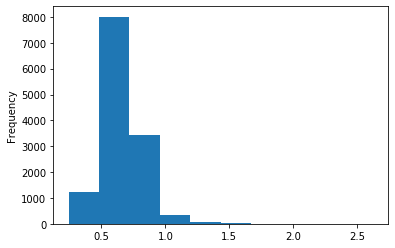

In [186]:
nyt_markets_df_bertsim['similiarity_score_bull_bert'].plot(kind='hist')
plt.show()

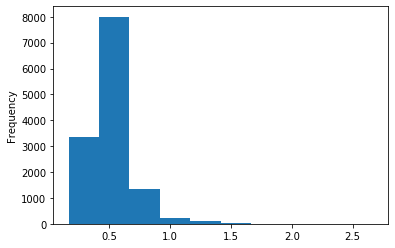

In [187]:
nyt_markets_df_bertsim['similiarity_score_bear_bert'].plot(kind='hist')
plt.show()

In [188]:
 nyt_markets_df_bertsim.columns

Index(['url', 'article', 'url_date', 'article_clean', 'similiarity_score_bull',
       'similiarity_score_bear', 'article_clean_2',
       'similiarity_score_bull_bert', 'similiarity_score_bear_bert'],
      dtype='object')

In [189]:
 nyt_markets_df_bertsim.drop(['similiarity_score_bull',
       'similiarity_score_bear'], axis=1,inplace=True)

In [190]:
nyt_markets_df_bertsim.dtypes

url                             object
article                         object
url_date                        object
article_clean                   object
article_clean_2                 object
similiarity_score_bull_bert    float64
similiarity_score_bear_bert    float64
dtype: object

# To measure bullish-ness vs bearish-ness, we will take the difference between the bullish and bearish semantic similarity score. 

# The plot below shows the distribution of this difference

In [191]:
nyt_markets_df_bertsim['sim_diff'] = nyt_markets_df_bertsim['similiarity_score_bull_bert']-nyt_markets_df_bertsim['similiarity_score_bear_bert']

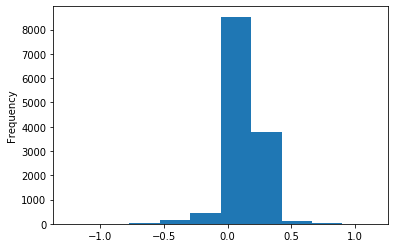

In [192]:
nyt_markets_df_bertsim['sim_diff'].plot(kind='hist')
plt.show()

In [193]:
nyt_markets_df_bertsim['sim_diff'].head()

0    0.220484
1    0.151275
2   -0.042859
3    0.102192
5    0.142446
Name: sim_diff, dtype: float64

In [194]:
nyt_markets_df_bertsim['bull_quart'] = pd.qcut(nyt_markets_df_bertsim['similiarity_score_bull_bert'], q=4)

In [195]:
nyt_markets_df_bertsim['bear_quart'] = pd.qcut(nyt_markets_df_bertsim['similiarity_score_bear_bert'], q=4)

In [196]:
nyt_markets_df_bertsim['diff_quart'] = pd.qcut(nyt_markets_df_bertsim['sim_diff'], q=4)

In [197]:
nyt_markets_df_bertsim['bull_quart'].value_counts()

(0.742, 2.623]    3271
(0.551, 0.634]    3271
(0.242, 0.551]    3271
(0.634, 0.742]    3270
Name: bull_quart, dtype: int64

In [198]:
nyt_markets_df_bertsim['bear_quart'].value_counts()

(0.586, 2.666]    3271
(0.412, 0.489]    3271
(0.163, 0.412]    3271
(0.489, 0.586]    3270
Name: bear_quart, dtype: int64

In [199]:
nyt_markets_df_bertsim['diff_quart'].value_counts()

(0.198, 1.141]     3271
(0.0936, 0.145]    3271
(-1.25, 0.0936]    3271
(0.145, 0.198]     3270
Name: diff_quart, dtype: int64

In [200]:
bin_labels_4 = ['Quart1', 'Quart2', 'Quart3', 'Quart4']
nyt_markets_df_bertsim['quantile_ex_3'] = pd.qcut(nyt_markets_df_bertsim['sim_diff'],
                              q=[0, .25, .5, .75,1],
                              labels=bin_labels_4)

In [201]:
nyt_markets_df_bertsim.head(30)

,url,article,url_date,article_clean,article_clean_2,similiarity_score_bull_bert,similiarity_score_bear_bert,sim_diff,bull_quart,bear_quart,diff_quart,quantile_ex_3
0,https://www.nytimes.com/2019/05/29/business/de...,Good Wednesday. (Want this by email? Sign up h...,2019-05-29,"[good, wednesday, want, email, sign, hereboth,...",good wednesday want email sign hereboth inside...,0.708576,0.488092,0.220484,"(0.634, 0.742]","(0.412, 0.489]","(0.198, 1.141]",Quart4
1,https://www.nytimes.com/2017/12/03/business/me...,Dozens of people were gathered on a Manhattan ...,2017-12-03,"[dozen, people, gathered, manhattan, rooftop, ...",dozens people gathered manhattan rooftop nibbl...,0.487005,0.335729,0.151275,"(0.242, 0.551]","(0.163, 0.412]","(0.145, 0.198]",Quart3
2,https://www.nytimes.com/2016/02/05/business/en...,LONDON — Royal Dutch Shell became the latest b...,2016-02-05,"[london, royal, dutch, shell, became, latest, ...",london royal dutch shell became latest big en...,2.622910,2.665769,-0.042859,"(0.742, 2.623]","(0.586, 2.666]","(-1.25, 0.0936]",Quart1
3,https://www.nytimes.com/2016/01/31/nytnow/your...,Here are the week’s top stories.1. The preside...,2016-01-31,"[week, top, story, presidential, candidate, ma...",weeks top stories presidential candidates made...,0.552746,0.450553,0.102192,"(0.551, 0.634]","(0.412, 0.489]","(0.0936, 0.145]",Quart2
5,https://www.nytimes.com/2016/06/24/world/middl...,"BURG MIGHEIZIL, Egypt — In the raggedy fishing...",2016-06-24,"[burg, migheizil, egypt, raggedy, fishing, vil...",burg migheizil egypt raggedy fishing village ...,0.618883,0.476437,0.142446,"(0.551, 0.634]","(0.412, 0.489]","(0.0936, 0.145]",Quart2
6,https://www.nytimes.com/2018/05/21/briefing/ju...,(Want to get this briefing by email? Here’s th...,2018-05-21,"[want, get, briefing, email, here, signupgood,...",want get briefing email heres signupgood morni...,0.651587,0.405595,0.245992,"(0.634, 0.742]","(0.163, 0.412]","(0.198, 1.141]",Quart4
7,https://www.nytimes.com/2018/03/30/briefing/ru...,(Want to get this briefing by email? Here’s th...,2018-03-30,"[want, get, briefing, email, here, signupgood,...",want get briefing email heres signupgood morni...,0.584884,0.462028,0.122856,"(0.551, 0.634]","(0.412, 0.489]","(0.0936, 0.145]",Quart2
8,https://www.nytimes.com/2019/03/22/world/europ...,ROME — President Xi Jinping of China arrived o...,2019-03-22,"[rome, president, xi, jinping, china, arrived,...",rome president xi jinping china arrived frida...,0.564254,0.481937,0.082316,"(0.551, 0.634]","(0.412, 0.489]","(-1.25, 0.0936]",Quart1
9,https://www.nytimes.com/interactive/2019/03/20...,Tell your fellow americans that you plan to cr...,2019-03-20,"[tell, fellow, american, plan, cross, united, ...",tell fellow americans plan cross united states...,0.577908,0.368411,0.209497,"(0.551, 0.634]","(0.163, 0.412]","(0.198, 1.141]",Quart4
10,https://www.nytimes.com/2019/08/25/world/europ...,"BIARRITZ, France — President Trump offered dee...",2019-08-25,"[biarritz, france, president, trump, offered, ...",biarritz france president trump offered deepl...,0.739429,0.662217,0.077212,"(0.634, 0.742]","(0.586, 2.666]","(-1.25, 0.0936]",Quart1


In [202]:
nyt_markets_df_bertsim['quantile_ex_3'].value_counts()

Quart4    3271
Quart2    3271
Quart1    3271
Quart3    3270
Name: quantile_ex_3, dtype: int64

# To identify the most bullish and most bearish articles, we first have to compute the similarity score to the bullish taxonomy and the bearish taxonomy. Once this done, we then take the difference between the bullish and bearish similarity scores. 

# With this difference existing in a new column, we can then try splitting the difference into quartiles, and label the quartiles from quart1 to quart4. 

# Quart1, has the smallest difference (ranging into the negatives) and will indicate the most bearish articles. On the contrary, quart4 has the highest difference and will be considered the most bullish. 


### The cells below will provide a sample text from bearish and bullish quartiles

In [203]:
nyt_markets_df_bertsim.loc[2,'article_clean_2']

'london  royal dutch shell became latest big energy company file damage report impact depressed oil prices saying thursday adjusted profit fell  percent fourth quarter  compared year earlierbut companys stock rose  percent amsterdam trading shell said would maintain dividend paying least  share promising continue pay dividends big petroleum companies also pledged do one ways reward investors industrys lean times  although analysts question long payouts sustained oil prices continue languishshell said earnings adjusted inventory changes  billion sharply  billion comparable period for  earnings fell  percent  billion compared  billion on conference call reporters thursday ben van beurden shells chief executive said pending acquisition british oil gas producer bg group expected completed weeks would opportunity streamline shells operations adapts changing energy industrymr van beurden said shell already cut  fulltime contractor positions additional  jobs would eliminated two companies mer

In [172]:
nyt_markets_df_bertsim.loc[23,'article_clean_2']

'hong kong  beijings grip slightly looser chinese markets steadied fridayexchanges europe also rose modestly start futures trading indicated wall street would open highertrading friday followed decision chinese government stop using measures known circuit breakers intended keep chinas markets dropping disastrously course single trading day circuitbreaker system used first time monday scrapped thursday night tripped twice week halts activity resumed seemed spur nervous investors broader selloffson friday shares shanghai shenzhen rose despite shaky opening hour sharp drops rises within minutes othermarkets seemed a little normal said thomas gatley corporate analyst gavekal dragonomics financial research company seesawing early morning mr gatley said we think part bunch mutual funds couldnt liquidate previous dayon thursday circuit breaker tripped  minutes trading resumed  minutes later indexes almost immediately fell daily limit trading halted day markets open less halfhour daythe remova

In [207]:
pickle.dump(nyt_markets_df_bertsim, open('nyt_markets_df_bert_sim_quartiles.pickle', 'wb'))

In [205]:
with open('nyt_markets_df_bert_sim_quartiles.pickle', 'rb') as dff:
    nyt_markets_df_bertsim_quartiles = pickle.load(dff)

In [206]:
nyt_markets_df_bertsim_quartiles.head(2)

,url,article,url_date,article_clean,article_clean_2,similiarity_score_bull_bert,similiarity_score_bear_bert,sim_diff,bull_quart,bear_quart,diff_quart,quantile_ex_3
0,https://www.nytimes.com/2019/05/29/business/de...,Good Wednesday. (Want this by email? Sign up h...,2019-05-29,"[good, wednesday, want, email, sign, hereboth,...",good wednesday want email sign hereboth inside...,0.708576,0.488092,0.220484,"(0.634, 0.742]","(0.412, 0.489]","(0.198, 1.141]",Quart4
1,https://www.nytimes.com/2017/12/03/business/me...,Dozens of people were gathered on a Manhattan ...,2017-12-03,"[dozen, people, gathered, manhattan, rooftop, ...",dozens people gathered manhattan rooftop nibbl...,0.487005,0.335729,0.151275,"(0.242, 0.551]","(0.163, 0.412]","(0.145, 0.198]",Quart3


# For the purposes of continuing the analysis, we will proceed by using cut rather than qcut. By cutting the data not into equal sample sizes, we will hopefully do a better job of capturing article content with higher sentiment. 

In [3]:

with open('nyt_markets_df_bert_sim.pickle', 'rb') as dff:
    nyt_markets_df_bertsim = pickle.load(dff)

In [4]:
df_bert = nyt_markets_df_bertsim

In [5]:
df_bert['bull_quart'] = pd.cut(nyt_markets_df_bertsim['similiarity_score_bull_bert'],bins=4)
df_bert['bear_quart'] = pd.cut(nyt_markets_df_bertsim['similiarity_score_bear_bert'],bins=4)


In [6]:
df_bert.head()

,url,article,url_date,article_clean,similiarity_score_bull,similiarity_score_bear,article_clean_2,similiarity_score_bull_bert,similiarity_score_bear_bert,bull_quart,bear_quart
0,https://www.nytimes.com/2019/05/29/business/de...,Good Wednesday. (Want this by email? Sign up h...,2019-05-29,"[good, wednesday, want, email, sign, hereboth,...",0.708576,NaN,good wednesday want email sign hereboth inside...,0.708576,0.488092,"(0.241, 0.838]","(0.162, 0.79]"
1,https://www.nytimes.com/2017/12/03/business/me...,Dozens of people were gathered on a Manhattan ...,2017-12-03,"[dozen, people, gathered, manhattan, rooftop, ...",NaN,NaN,dozens people gathered manhattan rooftop nibbl...,0.487005,0.335729,"(0.241, 0.838]","(0.162, 0.79]"
2,https://www.nytimes.com/2016/02/05/business/en...,LONDON — Royal Dutch Shell became the latest b...,2016-02-05,"[london, royal, dutch, shell, became, latest, ...",NaN,NaN,london royal dutch shell became latest big en...,2.622910,2.665769,"(2.028, 2.623]","(2.04, 2.666]"
3,https://www.nytimes.com/2016/01/31/nytnow/your...,Here are the week’s top stories.1. The preside...,2016-01-31,"[week, top, story, presidential, candidate, ma...",NaN,NaN,weeks top stories presidential candidates made...,0.552746,0.450553,"(0.241, 0.838]","(0.162, 0.79]"
5,https://www.nytimes.com/2016/06/24/world/middl...,"BURG MIGHEIZIL, Egypt — In the raggedy fishing...",2016-06-24,"[burg, migheizil, egypt, raggedy, fishing, vil...",NaN,NaN,burg migheizil egypt raggedy fishing village ...,0.618883,0.476437,"(0.241, 0.838]","(0.162, 0.79]"


In [7]:
pd.cut(nyt_markets_df_bertsim['similiarity_score_bull_bert'],bins=4).value_counts()

(0.241, 0.838]    11589
(0.838, 1.433]     1469
(1.433, 2.028]       24
(2.028, 2.623]        1
Name: similiarity_score_bull_bert, dtype: int64

In [8]:
pd.cut(nyt_markets_df_bertsim['similiarity_score_bear_bert'],bins=4).value_counts()


(0.162, 0.79]    12431
(0.79, 1.415]      610
(1.415, 2.04]       35
(2.04, 2.666]        7
Name: similiarity_score_bear_bert, dtype: int64

In [9]:
df_bert['sim_diff'] = df_bert['similiarity_score_bull_bert']-df_bert['similiarity_score_bear_bert']

In [11]:
abc = pd.cut(nyt_markets_df_bertsim['sim_diff'],bins=4).value_counts()


In [12]:
pd.DataFrame(abc)

,sim_diff
"(-0.0536, 0.544]",12385
"(-0.651, -0.0536]",614
"(0.544, 1.141]",61
"(-1.251, -0.651]",23


In [208]:
df_bert.head()

,url,article,url_date,article_clean,similiarity_score_bull,similiarity_score_bear,article_clean_2,similiarity_score_bull_bert,similiarity_score_bear_bert,bull_quart,bear_quart,sim_diff
0,https://www.nytimes.com/2019/05/29/business/de...,Good Wednesday. (Want this by email? Sign up h...,2019-05-29,"[good, wednesday, want, email, sign, hereboth,...",0.708576,NaN,good wednesday want email sign hereboth inside...,0.708576,0.488092,"(0.241, 0.838]","(0.162, 0.79]",0.220484
1,https://www.nytimes.com/2017/12/03/business/me...,Dozens of people were gathered on a Manhattan ...,2017-12-03,"[dozen, people, gathered, manhattan, rooftop, ...",NaN,NaN,dozens people gathered manhattan rooftop nibbl...,0.487005,0.335729,"(0.241, 0.838]","(0.162, 0.79]",0.151275
2,https://www.nytimes.com/2016/02/05/business/en...,LONDON — Royal Dutch Shell became the latest b...,2016-02-05,"[london, royal, dutch, shell, became, latest, ...",NaN,NaN,london royal dutch shell became latest big en...,2.622910,2.665769,"(2.028, 2.623]","(2.04, 2.666]",-0.042859
3,https://www.nytimes.com/2016/01/31/nytnow/your...,Here are the week’s top stories.1. The preside...,2016-01-31,"[week, top, story, presidential, candidate, ma...",NaN,NaN,weeks top stories presidential candidates made...,0.552746,0.450553,"(0.241, 0.838]","(0.162, 0.79]",0.102192
5,https://www.nytimes.com/2016/06/24/world/middl...,"BURG MIGHEIZIL, Egypt — In the raggedy fishing...",2016-06-24,"[burg, migheizil, egypt, raggedy, fishing, vil...",NaN,NaN,burg migheizil egypt raggedy fishing village ...,0.618883,0.476437,"(0.241, 0.838]","(0.162, 0.79]",0.142446


In [219]:
df_bert_cut_bull = df_bert[(df_bert['sim_diff'] >= .5) & (df_bert['sim_diff'] <= 2)]
df_bert_cut_bear = df_bert[(df_bert['sim_diff'] >= -2.251) & (df_bert['sim_diff'] <= -0.45)]


In [220]:
pickle.dump(df_bert_cut_bull , open('nyt_markets_df_bert_cut_bull.pickle', 'wb'))
pickle.dump(df_bert_cut_bear , open('nyt_markets_df_bert_cut_bear.pickle', 'wb'))

In [218]:
df_bert_cut_bear

,url,article,url_date,article_clean,similiarity_score_bull,similiarity_score_bear,article_clean_2,similiarity_score_bull_bert,similiarity_score_bear_bert,bull_quart,bear_quart,sim_diff
138,https://www.nytimes.com/2018/02/25/business/en...,Saudi Arabia has long been the dominant force ...,2018-02-25,"[saudi, arabia, long, dominant, force, oil, le...",NaN,NaN,saudi arabia long dominant force oil leaving w...,0.780301,1.297739,"(0.241, 0.838]","(0.79, 1.415]",-0.517438
187,https://news.blogs.nytimes.com/2016/05/09/the-...,THE CHALLENGE OF EASING SAUDI ARABIAâS DEPEN...,2016-05-09,"[challenge, easing, saudi, arabia, dependence,...",NaN,NaN,challenge easing saudi arabias dependence oil ...,0.714574,1.168621,"(0.241, 0.838]","(0.79, 1.415]",-0.454047
425,https://www.nytimes.com/2016/04/18/business/en...,"DOHA, Qatar — Officials from 18 oil-producing ...",2016-04-18,"[doha, qatar, official, oilproducing, nation, ...",NaN,NaN,doha qatar officials oilproducing nations fa...,0.762299,1.226174,"(0.241, 0.838]","(0.79, 1.415]",-0.463876
890,https://www.nytimes.com/2017/02/13/business/en...,When OPEC and other major oil exporters agreed...,2017-02-13,"[opec, major, oil, exporter, agreed, late, las...",NaN,NaN,opec major oil exporters agreed late last year...,0.836772,1.467311,"(0.241, 0.838]","(1.415, 2.04]",-0.630539
1141,https://www.nytimes.com/2016/12/10/business/ru...,Russia and other oil producers agreed on Satur...,2016-12-10,"[russia, oil, producer, agreed, saturday, join...",NaN,NaN,russia oil producers agreed saturday join opec...,0.721978,1.437863,"(0.241, 0.838]","(1.415, 2.04]",-0.715885
...,...,...,...,...,...,...,...,...,...,...,...,...
12699,https://www.nytimes.com/2016/04/30/business/en...,HOUSTON — The two mightiest American oil compa...,2016-04-30,"[houston, two, mightiest, american, oil, compa...",NaN,NaN,houston two mightiest american oil companies ...,0.826680,1.704562,"(0.241, 0.838]","(1.415, 2.04]",-0.877882
12776,https://www.nytimes.com/2016/09/02/business/en...,LONDON — Israel’s energy minister laid on the ...,2016-09-02,"[london, israel, energy, minister, laid, charm...",NaN,NaN,london israels energy minister laid charm spo...,0.802766,1.330950,"(0.241, 0.838]","(0.79, 1.415]",-0.528183
12862,https://www.nytimes.com/2017/05/15/business/en...,"With oil markets flagging, the world’s two big...",2017-05-15,"[oil, market, flagging, world, two, biggest, o...",NaN,NaN,oil markets flagging worlds two biggest oil ex...,0.833460,1.505269,"(0.241, 0.838]","(1.415, 2.04]",-0.671809
13045,https://www.nytimes.com/2016/05/05/business/en...,LONDON — Weak energy prices continue to take t...,2016-05-05,"[london, weak, energy, price, continue, take, ...",NaN,NaN,london weak energy prices continue take toll ...,1.584394,2.403416,"(1.433, 2.028]","(2.04, 2.666]",-0.819021
